In [28]:
from src.datasets import ThingsMEGDataset


# データの確認

In [26]:
train_set = ThingsMEGDataset("train", "data")

val_set = ThingsMEGDataset("val", "data")

test_set = ThingsMEGDataset("test", "data")


In [9]:
train_set


In [27]:
# train
print("=== train ===")
# データサイズ
print(len(train_set))
# 3番目のデータ
print(len(train_set[2]))
print(train_set[2])
print(train_set[2][0].shape)

# val
print("=== val ===")
print(len(val_set))
print(len(val_set[1]))
print(val_set[1])
print(val_set[1][0].shape)

# test
print("=== test ===")
print(len(test_set))
print(len(test_set[2]))
print(test_set[2])
print(test_set[2][0].shape)


=== train ===
65728
3
(tensor([[-0.8684, -1.3512, -0.8256,  ..., -0.8039, -1.5160, -1.0658],
        [-0.5087, -0.5633, -0.1187,  ..., -2.2858, -3.3537, -2.9062],
        [ 0.0885, -0.3724, -0.2974,  ..., -2.5506, -3.7884, -3.6018],
        ...,
        [ 0.6323,  0.2463, -0.2650,  ..., -0.3365, -0.4336, -0.9121],
        [-0.2075, -0.1536, -0.2615,  ...,  0.1124,  0.0472, -0.1219],
        [-1.5922, -1.4689, -0.9149,  ..., -1.9177, -1.8777, -1.4202]]), tensor(626), tensor(0))
torch.Size([271, 281])
=== val ===
16432
3
(tensor([[ 1.7594,  1.6767,  1.0630,  ..., -2.7883, -2.3485, -1.0546],
        [ 1.9286,  2.2507,  1.7769,  ..., -1.0647, -0.9009, -0.0463],
        [ 1.8900,  2.0532,  1.7212,  ..., -1.0936, -0.8736,  0.0341],
        ...,
        [ 1.1190,  0.8067,  0.9348,  ..., -1.5889,  1.5030,  4.0634],
        [ 1.0534,  1.0994,  1.0094,  ...,  0.5897,  1.5983,  1.9848],
        [ 0.4264, -0.7464, -0.7318,  ..., -8.6192, -6.5577, -4.4360]]), tensor(966), tensor(0))
torch.Size([271

### 学習データ
- サンプル数: 65728
- [`脳波(271x281)`, `クラス(1)`, `？(1)`]
- 脳波
  - チャンネル数`271`: 測定しているセンサが271個ある。[センサの位置関係](https://mne.tools/1.6/auto_examples/visualization/meg_sensors.html#ctf)も考慮に値する。
  - 系列長`281`: サンプル数が281回ということ。[サンプリングレートは200[Hz]](https://github.com/ailorg/dl_lecture_competition_pub/tree/MEG-competition-omni?tab=readme-ov-file#%E6%9B%B4%E6%96%B0)。
- クラス
  - 1854種類あるうちのどれか
  - 1854種類の詳細は`data/images/`のサブディレクトリ名

### 検証データ
- サンプル数: 16432 (訓練データの4分の1)
- 他は同じ

### テストデータ
- サンプル数: 16432 (訓練データの4分の1)
- [`脳波(271x281)`, `？(1)`]
  - クラス(正解ラベル)を除いたもの

# 脳波

In [29]:
import matplotlib.pyplot as plt


In [30]:
def plot_sample(data, title="Sample Data"):
    plt.figure(figsize=(10, 5))
    plt.imshow(data, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Channels')
    plt.show()


torch.Size([271, 281])


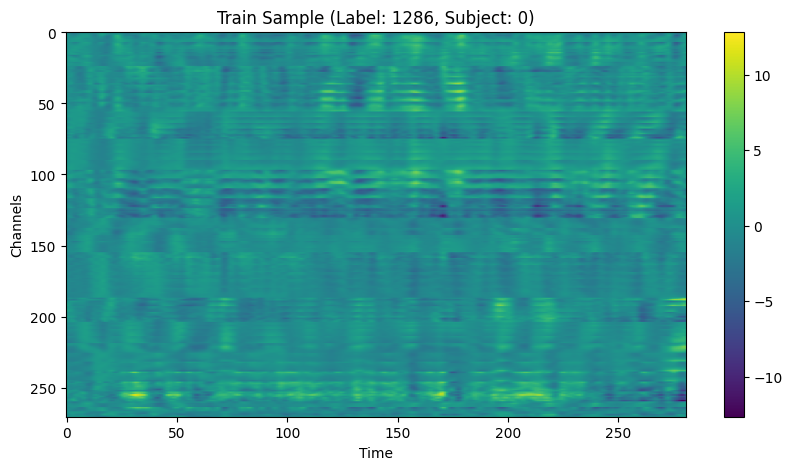

In [43]:
# データの取り出し
idx = 1076
sample_data, sample_label, sample_subject = train_set[idx]

# データの形状を確認
print(sample_data.shape)

# データの可視化
plot_sample(sample_data.numpy(), title=f"Train Sample (Label: {sample_label}, Subject: {sample_subject})")


# クラス
各クラスの代表的な画像。  
ラベル番号とクラス名のつながりがよくわからない。`train_image_path`に書いてあるのがそうなのか。

In [35]:
import os
import numpy as np
from PIL import Image


In [36]:
def get_class_name_and_image(data_dir, label_number):
    subdirs = sorted(os.listdir(data_dir))
    if label_number < 0 or label_number >= len(subdirs):
        raise ValueError(f"Invalid label number: {label_number}")
    
    class_name = subdirs[label_number]
    class_dir = os.path.join(data_dir, class_name)
    
    images = sorted(os.listdir(class_dir))
    if len(images) == 0:
        raise ValueError(f"No images found in directory: {class_dir}")
    
    first_image_path = os.path.join(class_dir, images[0])
    return class_name, first_image_path


In [37]:
def show_image(image_path, title="Image"):
    img = Image.open(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(np.asarray(img))
    plt.title(title)
    plt.axis('off')
    plt.show()


Class Name: abacus


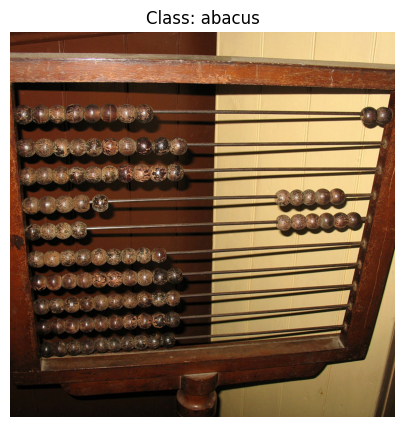

In [40]:
data_dir = "data/Images"
label_number = 1

try:
    class_name, image_path = get_class_name_and_image(data_dir, label_number)
    print(f"Class Name: {class_name}")
    show_image(image_path, title=f"Class: {class_name}")
except ValueError as e:
    print(e)
